# Modelo preditivo de machine learning para prever se o cliente terá o empréstimo liberado

In [ ]:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import time

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_excel("/content/dados_credito.xlsx")

In [ ]:
df.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,0,8,Sim,1800,0,0,56.000000,SIM
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,0,9,Não,4800,1,50000,18.000000,NAO
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,0,18,Sim,2200,2,30000,45.000000,SIM
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,0,22,Não,3900,0,0,28.666667,NAO
4,6,SP,30,Segundo Grau Completo,Divorciado,0,Não,0,0,0,14,Sim,3100,2,40000,39.666667,SIM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              4000 non-null   int64  
 1   UF                          4000 non-null   object 
 2   IDADE                       4000 non-null   int64  
 3   ESCOLARIDADE                4000 non-null   object 
 4   ESTADO_CIVIL                4000 non-null   object 
 5   QT_FILHOS                   4000 non-null   int64  
 6   CASA_PROPRIA                4000 non-null   object 
 7   QT_IMOVEIS                  4000 non-null   int64  
 8   VL_IMOVEIS                  4000 non-null   int64  
 9   OUTRA_RENDA_VALOR           4000 non-null   int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  4000 non-null   int64  
 11  TRABALHANDO_ATUALMENTE      4000 non-null   object 
 12  ULTIMO_SALARIO              4000 non-null   int64  
 13  QT_CARROS                   4000 

In [ ]:
df.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA_VALOR,0
TEMPO_ULTIMO_EMPREGO_MESES,0


In [ ]:
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,41.006500,1.116000,0.848250,238716.250000,643.650000,43.142750,8293.27500,0.936000,41023.000000,60.241018
std,13.905891,0.975593,0.958098,266010.406037,1297.939074,40.893911,5829.10258,0.806887,47461.411877,25.672385
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.00000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.00000,0.000000,0.000000,39.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.00000,1.000000,35000.000000,61.666667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.00000,2.000000,50000.000000,83.666667
max,65.000000,3.000000,3.000000,900000.000000,4000.000000,150.000000,22000.00000,2.000000,180000.000000,98.000000


In [ ]:
variaveis_numericas = []
for i in df.columns.tolist():
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    print(i, ':', df.dtypes[i])
    variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : int64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE_CREDITO : float64


In [ ]:
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE_CREDITO']

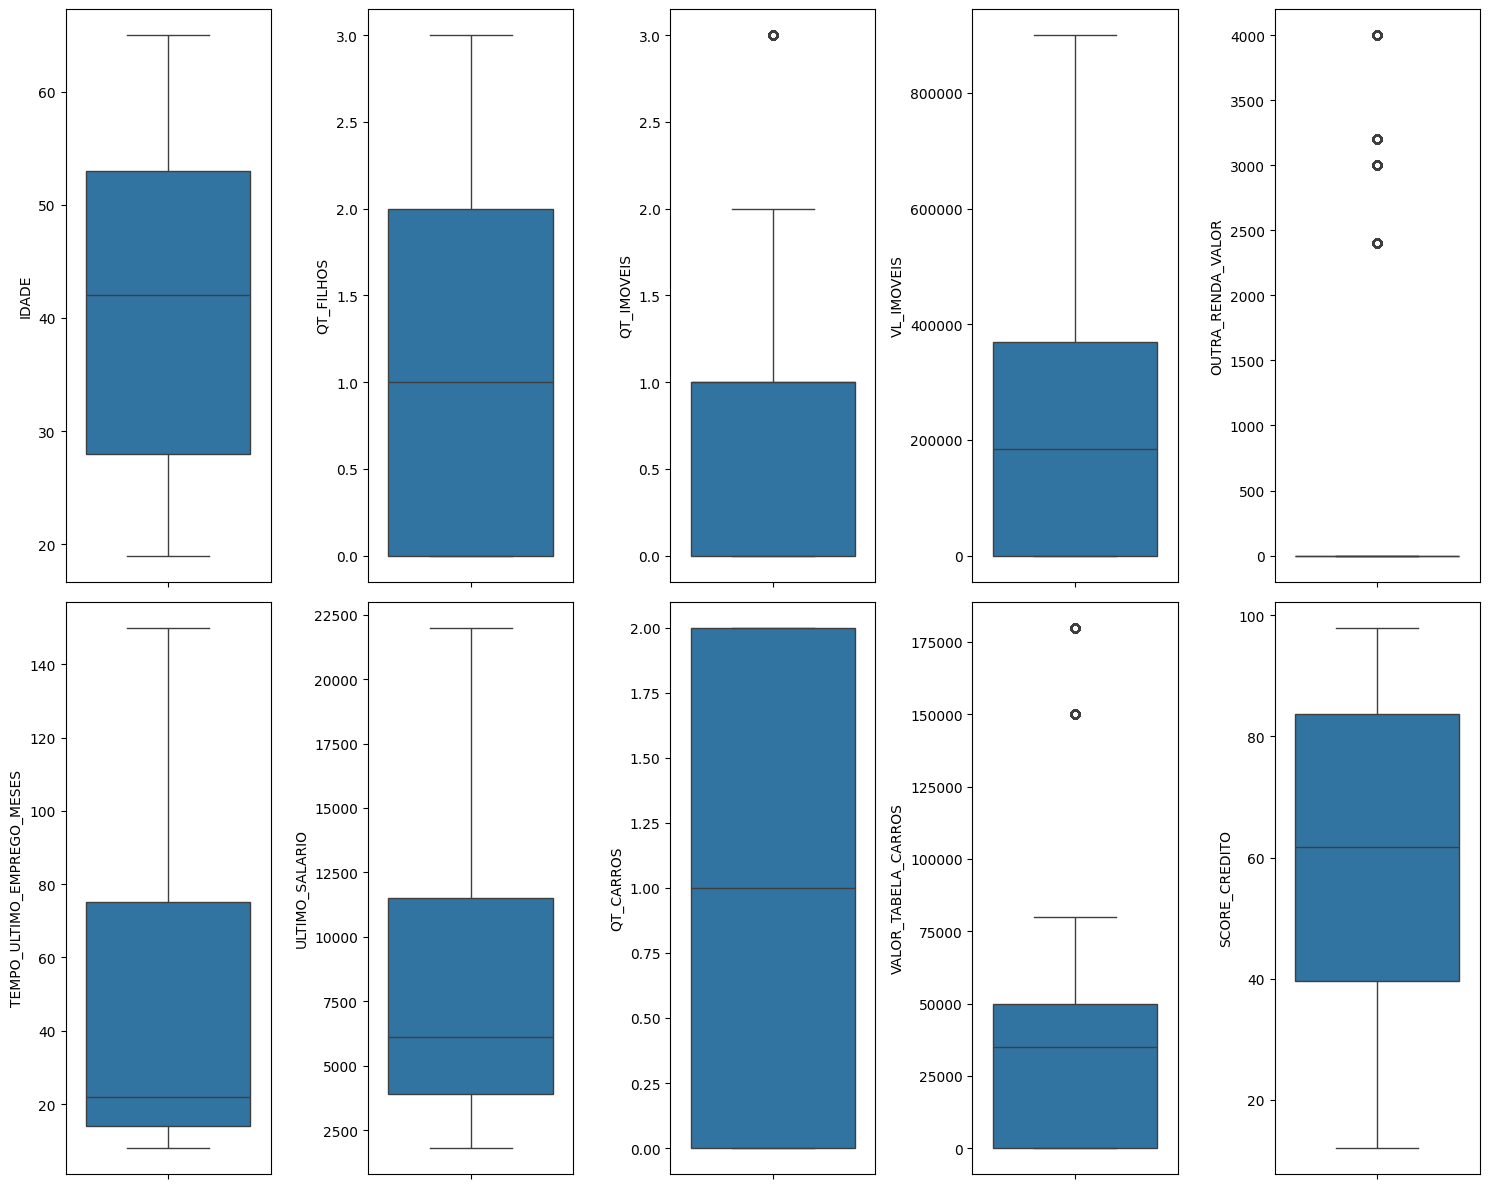

In [ ]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 5)

linha = 0
coluna = 0

for i in variaveis_numericas:
  sns.boxplot(data = df, y = i, ax = axes[linha][coluna])
  coluna += 1
  if coluna == 5:
    linha += 1
    coluna = 0

plt.show()

In [ ]:
df.groupby(['OUTRA_RENDA_VALOR']).size()

,0
OUTRA_RENDA_VALOR,
0,3186
2400,179
3000,235
3200,200
4000,200


In [ ]:
df.groupby(['VALOR_TABELA_CARROS']).size()

,0
VALOR_TABELA_CARROS,
0,1438
28000,179
30000,302
35000,300
40000,301
48000,200
50000,502
70000,199
80000,200


In [ ]:
df.groupby(['QT_IMOVEIS']).size()

,0
QT_IMOVEIS,
0,1785
1,1437
2,378
3,400


In [ ]:
variaveis_categoricas = []
for i in df.columns.tolist():
  if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':
    print(i, ':', df.dtypes[i])
    variaveis_categoricas.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
TRABALHANDO_ATUALMENTE : object
EMPRESTIMO : object


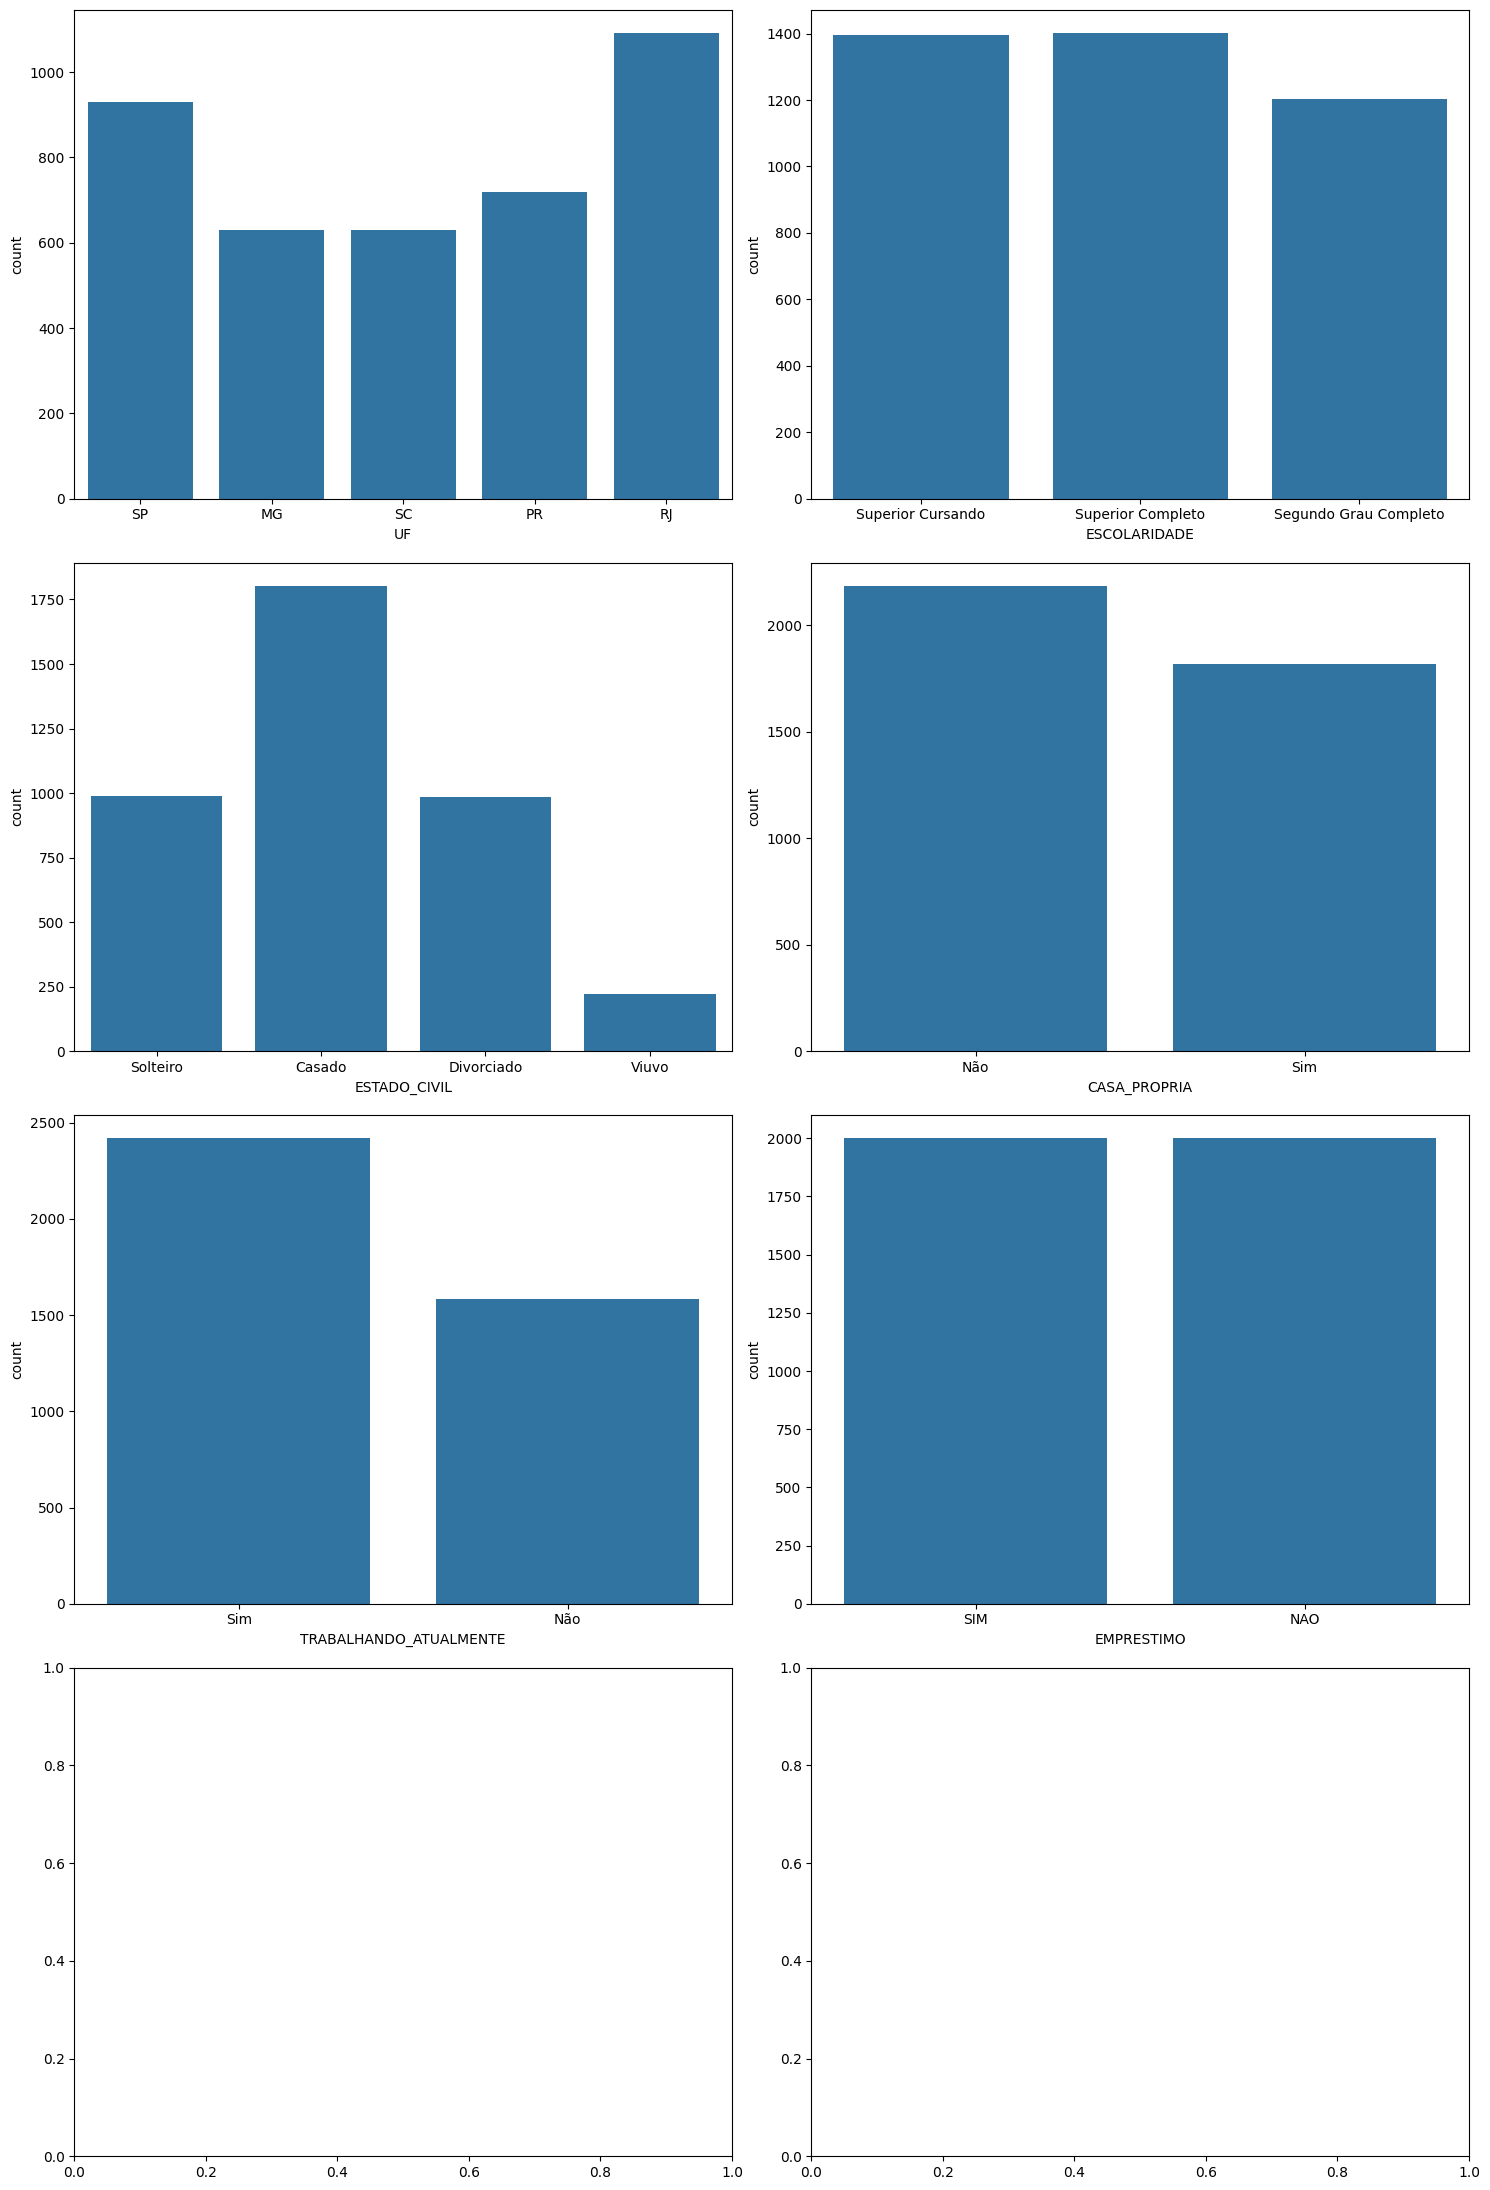

In [ ]:
plt.rcParams["figure.figsize"] = [15.00, 22.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4, 2)

linha = 0
coluna = 0

for i in variaveis_categoricas:
  sns.countplot(data = df, x = i, ax = axes[linha][coluna])
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show()

In [ ]:
lb = LabelEncoder()

df['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['ESTADO_CIVIL'] = lb.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = lb.fit_transform(df['CASA_PROPRIA'])
df['ESCOLARIDADE'] = lb.fit_transform(df['ESCOLARIDADE'])
df['UF'] = lb.fit_transform(df['UF'])

df.dropna(inplace=True)

In [ ]:
df.head(25)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO,EMPRESTIMO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.000000,SIM
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.000000,NAO
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.000000,SIM
3,1,27,2,0,1,1,0,0,0,22,0,3900,0,0,28.666667,NAO
4,4,30,0,1,0,0,0,0,0,14,1,3100,2,40000,39.666667,SIM
5,0,32,2,2,1,1,1,185000,3000,19,1,6800,0,0,45.166667,NAO
6,3,35,1,2,1,1,2,450000,2400,25,1,22000,1,150000,50.666667,SIM
7,1,42,0,0,0,0,0,0,0,48,1,4500,2,28000,56.166667,NAO
8,2,45,2,0,0,0,0,0,0,120,0,9800,0,0,61.666667,SIM
9,4,48,1,1,2,1,2,600000,0,15,1,15000,1,70000,67.166667,NAO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          4000 non-null   int64  
 1   IDADE                       4000 non-null   int64  
 2   ESCOLARIDADE                4000 non-null   int64  
 3   ESTADO_CIVIL                4000 non-null   int64  
 4   QT_FILHOS                   4000 non-null   int64  
 5   CASA_PROPRIA                4000 non-null   int64  
 6   QT_IMOVEIS                  4000 non-null   int64  
 7   VL_IMOVEIS                  4000 non-null   int64  
 8   OUTRA_RENDA_VALOR           4000 non-null   int64  
 9   TEMPO_ULTIMO_EMPREGO_MESES  4000 non-null   int64  
 10  TRABALHANDO_ATUALMENTE      4000 non-null   int64  
 11  ULTIMO_SALARIO              4000 non-null   int64  
 12  QT_CARROS                   4000 non-null   int64  
 13  VALOR_TABELA_CARROS         4000 

In [ ]:
variavel_alvo = df.iloc[:,15]

In [ ]:
variavel_alvo.head()

,EMPRESTIMO
0,SIM
1,NAO
2,SIM
3,NAO
4,SIM


In [ ]:
variavel_explicativa = df.copy()

del variavel_explicativa['EMPRESTIMO']

variavel_explicativa.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE_CREDITO
0,4,19,2,2,0,0,0,0,0,8,1,1800,0,0,56.000000
1,0,23,1,2,1,0,0,0,0,9,0,4800,1,50000,18.000000
2,3,25,0,0,0,1,1,220000,0,18,1,2200,2,30000,45.000000
3,1,27,2,0,1,1,0,0,0,22,0,3900,0,0,28.666667
4,4,30,0,1,0,0,0,0,0,14,1,3100,2,40000,39.666667


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(variavel_explicativa, variavel_alvo, test_size = 0.3, random_state = 40)

In [ ]:
sc = MinMaxScaler()
x_treino_normalizados = sc.fit_transform(x_treino)
x_teste_normalizados = sc.transform(x_teste)

In [ ]:
modelo = RandomForestClassifier()

In [ ]:
modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = np.array([100,150,200,250,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([2,5])
min_samples_leaf = np.array([1,2,3])
bootstrap = np.array([True,False])

grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       bootstrap = bootstrap)

clf = GridSearchCV(modelo, grid_parametros, cv = 3, n_jobs = 8)

inicio = time.time()
clf.fit(x_treino_normalizados, y_treino)
fim = time.time()

treinos = pd.DataFrame(clf.cv_results_)

print(f"Acurácia em Treinamento: {clf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {clf.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos.shape[0])

Acurácia em Treinamento: 84.32%

Hiperparâmetros Ideais: {'bootstrap': np.True_, 'criterion': np.str_('gini'), 'max_depth': np.int64(20), 'max_features': 'log2', 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'n_estimators': np.int64(150)}

Tempo de Treinamento do Modelo:  1359.25

Numero de treinamentos realizados:  720


In [ ]:
treinos.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.707479,0.150601,0.097805,0.049246,True,gini,10,sqrt,1,2,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.832976,0.842444,0.847803,0.841074,0.006130,49
1,2.584939,0.146680,0.190125,0.053263,True,gini,10,sqrt,1,2,150,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.823340,0.837085,0.841372,0.833932,0.007691,428
2,3.731827,0.036866,0.249153,0.006606,True,gini,10,sqrt,1,2,200,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.817987,0.840300,0.848875,0.835721,0.013019,356
3,4.542202,0.361852,0.447346,0.119228,True,gini,10,sqrt,1,2,250,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.817987,0.836013,0.845659,0.833220,0.011468,450
4,6.411641,0.087883,0.526838,0.130000,True,gini,10,sqrt,1,2,300,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.820128,0.843516,0.849946,0.837863,0.012812,186


In [ ]:
clf = RandomForestClassifier(n_estimators = 150,
                             criterion = 'gini',
                             max_depth = 20,
                             max_features = 'log2',
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             bootstrap = True)

clf = clf.fit(x_treino_normalizados, y_treino)

In [ ]:
scores = clf.score(x_treino_normalizados, y_treino)
scores

0.8735714285714286

In [ ]:
scores = clf.score(x_teste_normalizados, y_teste)
scores

0.8191666666666667

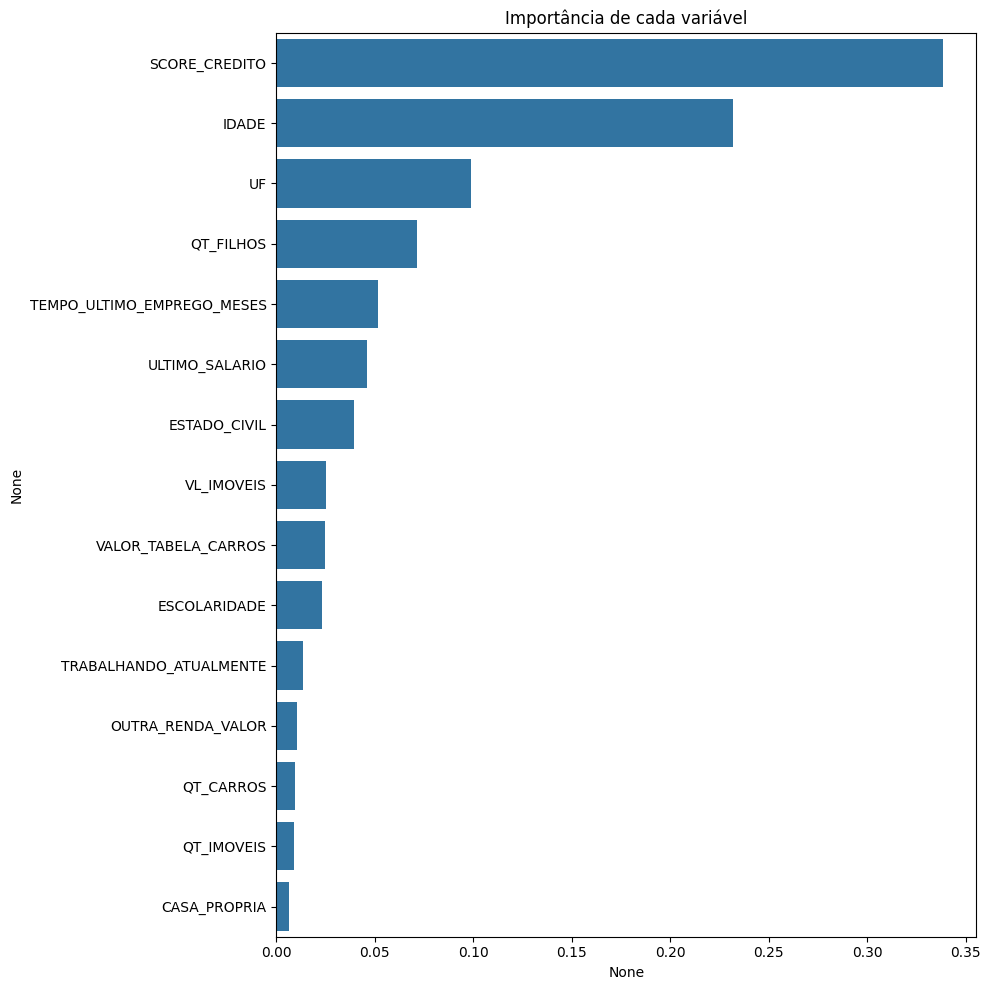

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data = clf.feature_importances_, index=variavel_explicativa.columns)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, y = importances.index, orient = 'h').set_title('Importância de cada variável')
plt.show()

In [ ]:
importances.sort_values(ascending=False)

,0
SCORE_CREDITO,0.338330
IDADE,0.231920
UF,0.098714
QT_FILHOS,0.071435
TEMPO_ULTIMO_EMPREGO_MESES,0.051530
ULTIMO_SALARIO,0.045818
ESTADO_CIVIL,0.039652
VL_IMOVEIS,0.025373
VALOR_TABELA_CARROS,0.024527
ESCOLARIDADE,0.023223
